In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../Downloads/co2.csv", index_col = "Date", parse_dates = ["Date"])
df.head()

,Decimal Date,Average,Interpolated,Trend,Number of Days
Date,,,,,
1958-01-03,1958.208,315.71,315.71,314.62,-1
1958-01-04,1958.292,317.45,317.45,315.29,-1
1958-01-05,1958.375,317.50,317.50,314.71,-1
1958-01-06,1958.458,-99.99,317.10,314.85,-1
1958-01-07,1958.542,315.86,315.86,314.98,-1


<AxesSubplot:xlabel='Date'>

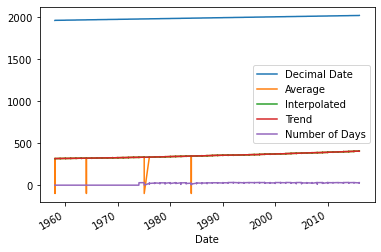

In [5]:
df.plot()

In [9]:
df.isna().sum()

Decimal Date      0
Average           0
Interpolated      0
Trend             0
Number of Days    0
dtype: int64

In [24]:
df.shape

(706, 5)

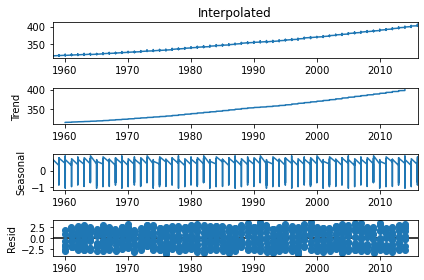

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df["Interpolated"], period = 54)
fig = decomp.plot()

In [25]:
from pmdarima import auto_arima

In [31]:
auto_arima = auto_arima(df["Interpolated"], trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1387.127, Time=1.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2290.715, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1814.502, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1870.801, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2296.126, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1653.292, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1386.297, Time=0.64 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1721.966, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1623.903, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1387.341, Time=1.43 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1551.476, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1388.496, Time=1.89 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1476.010, Time=0.17 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 6.737 seconds


In [37]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df["Interpolated"], order = (2,0,1))
model_fit = model.fit()
model_fit.summary()

C:\Users\sarth\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\sarth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Interpolated   No. Observations:                  706
Model:                     ARMA(2, 1)   Log Likelihood                -862.594
Method:                       css-mle   S.D. of innovations              0.816
Date:                Mon, 05 Jul 2021   AIC                           1735.187
Time:                        23:02:24   BIC                           1757.985
Sample:                             0   HQIC                          1743.996
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                355.3393     24.586     14.453      0.000     307.152     403.527
ar.L1.Interpolated     1.5697      0.036     44.135      0.000       1.500       1.639
ar.L2.Interpolated    -0.5709      0.036    -16.026      0.000      -0.641      -0.501
ma.L1.Interpolated     0.3592      0.034     10.517      0.000       0.292       0.426
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0028           +0.0000j            1.0028            0.0000
AR.2            1.7467           +0.0000j            1.7467            0.0000
MA.1           -2.7841           +0.0000j            2.7841            0.5000
-----------------------------------------------------------------------------
"""

In [38]:
ypred = model_fit.predict()

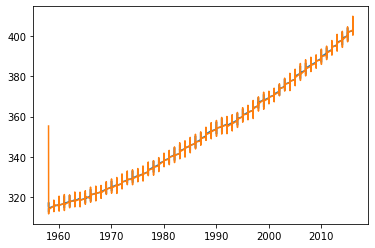

In [39]:
plt.plot(df["Interpolated"])
plt.plot(ypred)

In [49]:
#auto_arima = auto_arima(df["Interpolated"], trace=True, seasonal_order=True, m=12)

TypeError: 'ARIMA' object is not callable

C:\Users\sarth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sarth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


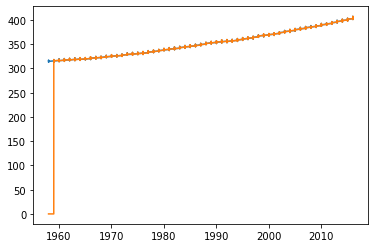

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df["Interpolated"], order = (2,0,0), seasonal_order=(0, 1, 1, 12)).fit(disp=0)
ypred = model.predict()
plt.plot(df["Interpolated"])
plt.plot(ypred)

In [64]:
def checkParameters(params):
    result=pd.DataFrame(columns=["Parameter","AIC"])
    par=[]
    maic=[]
    for i in params:
        #SARIMAX(order=(p,q,d),seasonal_order=(P,D,Q,m))
        model=SARIMAX(df["Interpolated"],order=(i[0],d,i[1]),seasonal_order=(i[2],D,i[3],m)).fit(disp=0)
        par.append(i)
        maic=model.aic
    result["Parameter"]=par
    result["AIC"]=maic
    return result

In [65]:
from itertools import product
p=range(0,2,1)
d=1
q=range(0,2,1)
P=range(0,2,1)
D=1
Q=range(0,2,1)
m=12
pr=product(p,q,P,Q)

In [66]:
checkParameters(pr)

C:\Users\sarth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sarth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sarth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sarth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no ass

,Parameter,AIC
0,"(0, 0, 0, 0)",369.487747
1,"(0, 0, 0, 1)",369.487747
2,"(0, 0, 1, 0)",369.487747
3,"(0, 0, 1, 1)",369.487747
4,"(0, 1, 0, 0)",369.487747
5,"(0, 1, 0, 1)",369.487747
6,"(0, 1, 1, 0)",369.487747
7,"(0, 1, 1, 1)",369.487747
8,"(1, 0, 0, 0)",369.487747
9,"(1, 0, 0, 1)",369.487747
